In [345]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import cycle

In [346]:
#https://data.oecd.org/inequality/income-inequality.htm
df = pd.read_csv("income_ineq.csv")

In [347]:
for col in df:
    print(col, df[col].unique())

LOCATION ['AUS' 'AUT' 'BEL' 'CAN' 'CZE' 'DNK' 'FIN' 'FRA' 'DEU' 'GRC' 'HUN' 'ISL'
 'IRL' 'ITA' 'JPN' 'KOR' 'LUX' 'MEX' 'NLD' 'NZL' 'NOR' 'POL' 'PRT' 'SVK'
 'ESP' 'SWE' 'CHE' 'TUR' 'GBR' 'USA' 'CHL' 'EST' 'ISR' 'SVN' 'RUS' 'LVA'
 'LTU' 'BRA' 'CHN' 'CRI' 'IND' 'ZAF' 'BGR' 'ROU']
INDICATOR ['INCOMEINEQ']
SUBJECT ['P50P10' 'P90P10' 'P90P50' 'GINI' 'S80S20' 'PALMA']
MEASURE ['RT' 'INEQ']
FREQUENCY ['A']
TIME [2012 2014 2016 2018 2007 2008 2009 2010 2011 2013 2015 2017 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2019]
Value [ 2.2    2.1    4.4    4.3    2.     0.326  0.337  0.33   0.325  1.9
  3.6    3.4    3.5    3.3    1.8    1.7    0.284  0.28   0.289  0.281
  0.276  0.274  0.275  3.2    0.258  2.3    2.4    4.2    4.1    4.
  3.9    3.8    0.303  0.294  0.288  0.292  0.3    0.297  0.293  0.291
  0.286  0.296  0.29   0.301  0.304  0.31   0.308  0.315  0.317  0.321
  0.316  0.3

In [348]:
df.head(1)

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,INCOMEINEQ,P50P10,RT,A,2012,2.2,NaN


In [349]:
df = df.drop((['INDICATOR', 'MEASURE', 'FREQUENCY', 'Flag Codes']), axis = 1)

In [350]:
df.head()

,LOCATION,SUBJECT,TIME,Value
0,AUS,P50P10,2012,2.2
1,AUS,P50P10,2014,2.2
2,AUS,P50P10,2016,2.1
3,AUS,P50P10,2018,2.2
4,AUS,P90P10,2012,4.4


In [351]:
df = df.pivot(index=['TIME', 'SUBJECT'],columns='LOCATION',values='Value').reset_index()
df = df.set_index(['TIME','SUBJECT'])
df.index.names = ['YEAR','TYPE']

In [352]:
df.head(1)

,LOCATION,AUS,AUT,BEL,BGR,BRA,CAN,CHE,CHL,CHN,CRI,...,POL,PRT,ROU,RUS,SVK,SVN,SWE,TUR,USA,ZAF
YEAR,TYPE,,,,,,,,,,,,,,,,,,,,,
1976,GINI,NaN,NaN,NaN,NaN,NaN,0.303,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [353]:
idx = pd.IndexSlice
df.loc[idx[:,'GINI'],:].tail(3)

,LOCATION,AUS,AUT,BEL,BGR,BRA,CAN,CHE,CHL,CHN,CRI,...,POL,PRT,ROU,RUS,SVK,SVN,SWE,TUR,USA,ZAF
YEAR,TYPE,,,,,,,,,,,,,,,,,,,,,
2017,GINI,NaN,0.275,NaN,0.395,NaN,0.310,0.299,0.46,NaN,0.480,...,0.275,0.320,0.351,NaN,0.220,0.243,0.282,NaN,0.39,NaN
2018,GINI,0.325,0.280,0.258,0.408,NaN,0.303,NaN,NaN,NaN,0.479,...,0.281,0.317,0.350,NaN,0.236,0.249,0.275,NaN,NaN,NaN
2019,GINI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.478,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [354]:
df.loc[idx[2018, :],:].head(3)

LOCATION       AUS   AUT    BEL    BGR  BRA    CAN  CHE  CHL  CHN     CRI  \
YEAR TYPE                                                                   
2018 GINI    0.325  0.28  0.258  0.408  NaN  0.303  NaN  NaN  NaN   0.479   
     P50P10  2.200  2.00  1.900  2.500  NaN  2.100  NaN  NaN  NaN   3.100   
     P90P10  4.300  3.50  3.200  5.800  NaN  4.000  NaN  NaN  NaN  10.200   

LOCATION     ...    POL    PRT   ROU  RUS    SVK    SVN    SWE  TUR  USA  ZAF  
YEAR TYPE    ...                                                               
2018 GINI    ...  0.281  0.317  0.35  NaN  0.236  0.249  0.275  NaN  NaN  NaN  
     P50P10  ...  2.000  2.000  2.80  NaN  1.800  1.800  1.900  NaN  NaN  NaN  
     P90P10  ...  3.600  4.100  6.00  NaN  3.000  3.100  3.300  NaN  NaN  NaN  

[3 rows x 44 columns]

In [355]:
df_gini = df.loc[idx[:,'GINI'],:]

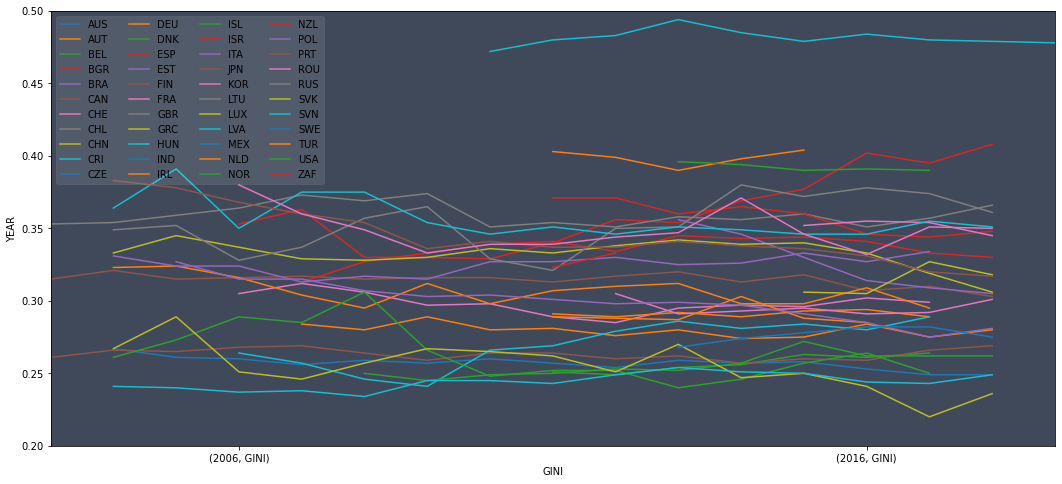

In [356]:
lines = ["-","--","-.",":"]
linecycler = cycle(lines)

ax = df_gini.plot(figsize=(18,8))

ax.set_facecolor("#3F495A")
ax.set_xlim(27, 43)
ax.set_ylim(0.2, 0.5)

ax.set_xlabel('GINI', fontsize='medium')
ax.set_ylabel('YEAR', fontsize='medium') 
ax.xaxis.label.set_size(10)

plt.legend(loc='upper left', ncol=4, fontsize=10, facecolor='white', framealpha=0.1)